This example uses the *matrix* method to generate the *Hn*.  This example uses simple emoji style faces.

In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import NONE, VERTEX, BETA, ALPHA
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTMatrix import to_matrix, from_matrix, matrix_to_string

import numpy as np

from pprint import pprint

from IPython.display import Image, display

pictures_dir = "pictures/Faces/"
parser = load_parser()

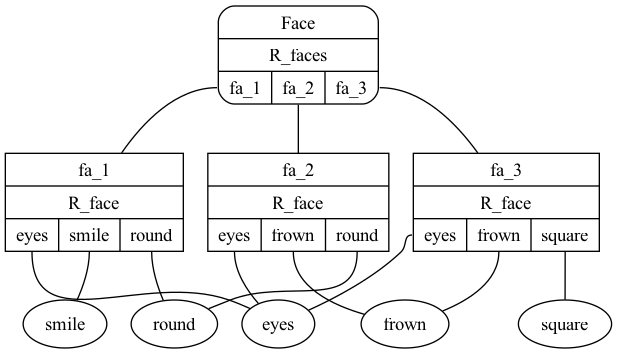

In [2]:
face1 = Hypernetwork()

compile_hn(face1, parser, """
    Face={fa_1, fa_2, fa_3; R_faces}
    fa_1=<eyes, smile, round; R_face>
    fa_2=<eyes, frown, round; R_face>
    fa_3=<eyes, frown, square; R_face>
""")

draw_hn(face1, fname=pictures_dir+"face1", view=False)
Image(filename=pictures_dir+'face1.png', width=700, height=500)

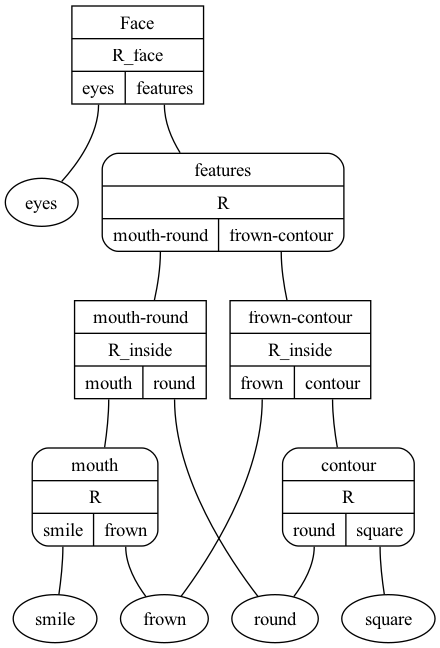

In [3]:
# print(face1)

def replace(hn, x, y, r=""):
    hn.hypernetwork[x].R = r
    hn.hypernetwork[x].vertex = y
    hn.hypernetwork[y] = hn.hypernetwork.pop(x)
    
    for n, hs in hn.hypernetwork.items():
        if x in hs.partOf:
            hs.partOf = set([item.replace(x, y) for item in hs.partOf])

        if x in hs.simplex:
            hs.simplex = [item.replace(x, y) for item in hs.simplex]

            
M = to_matrix(face1, R="face")
new_face1 = from_matrix(M[0], R="face")

replace(new_face1, "@Hs_5@", "Face", "face")
replace(new_face1, "@Hs_0@", "mouth", "")
replace(new_face1, "@Hs_2@", "contour", "")
replace(new_face1, "@Hs_4@", "features", "")
replace(new_face1, "@Hs_1@", "mouth-round", "inside")
replace(new_face1, "@Hs_3@", "frown-contour", "inside")

# new_face1.hypernetwork["@Hs_5@"].vertex = "F"

draw_hn(new_face1, fname=pictures_dir+"face1-M", view=False)
Image(filename=pictures_dir+'face1-M.png', width=400, height=600)

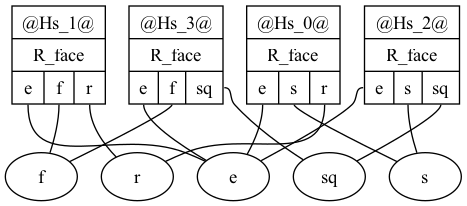

In [4]:
face3 = Hypernetwork()

compile_hn(face3, parser, """
    <e, s, r; R_face>
    <e, f, r; R_face>
    <e, s, sq; R_face>
    <e, f, sq; R_face>
""")

# print(face3)

draw_hn(face3, fname=pictures_dir+"face3", view=False)
Image(filename=pictures_dir+'face3.png', width=400, height=600)

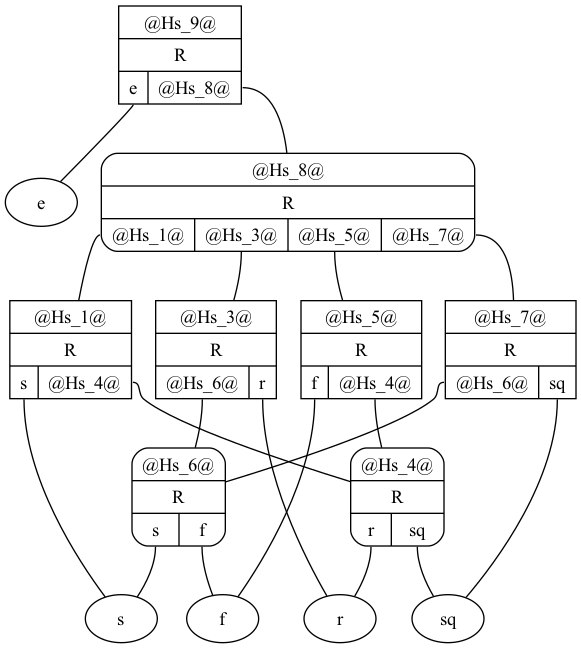

In [5]:
M = to_matrix(face3, R="face")

new_face3 = from_matrix(M, R="face")

# print(new_face3)

draw_hn(new_face3, fname=pictures_dir+"face3-M", view=False)
Image(filename=pictures_dir+'face3-M.png', width=400, height=600)

In [6]:
def format_hn(hn):
    class Hn:
        hn = {}
        
    def _first_pass():
        for name in hn.hypernetwork:
            hs = hn.hypernetwork[name]
            if hs.hstype in [ALPHA, BETA]:
                Hn.hn.update({name: hs})
        
    def _second_pass():
        for name, hs in Hn.hn.items():
            for i, vertex in enumerate(hs.simplex):
                if vertex[:4] == "@Hs_":
                    Hn.hn[vertex].simplex[i] = str(hn.hypernetwork[vertex])[len(vertex)+1:]
                    print("HELLO ", Hn.hn[vertex].simplex)

    hn_str = ""
    _first_pass()
    _second_pass()
    
#     for name in hn.hypernetwork:
#         hs = hn.hypernetwork[name]
#         hn_str = str(hs)

#         if hs.hstype in [ALPHA, BETA]:
#             for vertex in hs.simplex:
#                 if hn.hypernetwork[vertex].hstype in [ALPHA, BETA]:
#                     hs_str = str(hn.hypernetwork[vertex])[len(vertex)+1:]
#                     print(hs_str)
#                     hn_str.replace(vertex, hs_str)
#                     print(hn_str)

    return hn_str
                    
print(format_hn(face1))

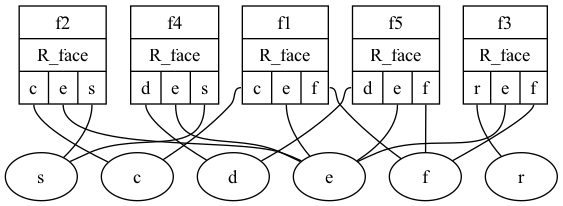

In [7]:
face4 = Hypernetwork()

compile_hn(face4, parser, """
    f1=<c, e, f; R_face>
    f2=<c, e, s; R_face>
    f3=<r, e, f; R_face>
    f4=<d, e, s; R_face>
    f5=<d, e, f; R_face>
""")
    
draw_hn(face4, fname=pictures_dir+"face4", view=False)
Image(filename=pictures_dir+'face4.png', width=500, height=500)

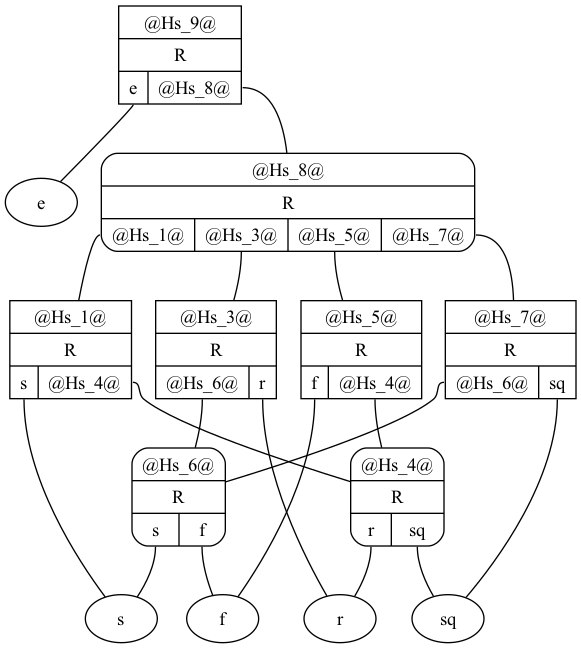

In [8]:
new_face4 = from_matrix(M, R="face")
draw_hn(new_face4, fname=pictures_dir+"face4-M", view=False)
Image(filename=pictures_dir+'face4-M.png', width=600, height=600)

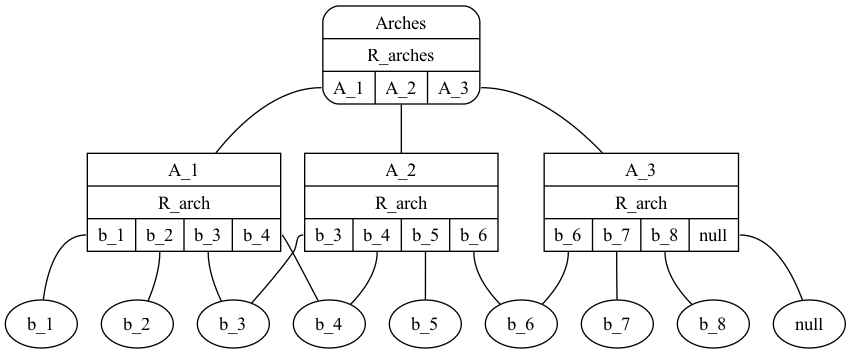

In [24]:
arches = Hypernetwork()

compile_hn(arches, parser, """
    Arches={A_1, A_2, A_3; R_arches}
    A_1=<b_1, b_2, b_3, b_4; R_arch>
    A_2=<b_3, b_4, b_5, b_6; R_arch>
    A_3=<b_6, b_7, b_8, null; R_arch>
""")

draw_hn(arches, fname=pictures_dir+"arches", view=False)
Image(filename=pictures_dir+'arches.png', width=700, height=500)

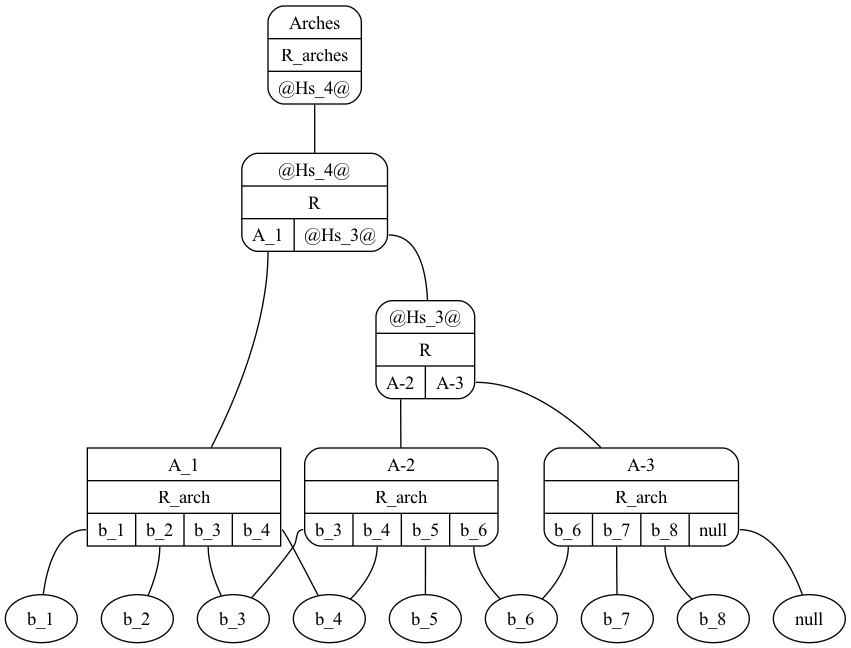

In [32]:
M = to_matrix(arches, R="arches")

new_arches = from_matrix(M, R="arch")

replace(new_arches, "@Hs_5@", "Arches", "arches")
replace(new_arches, "@Hs_0@", "A_1", "arch")
replace(new_arches, "@Hs_1@", "A-2", "arch")
replace(new_arches, "@Hs_2@", "A-3", "arch")
# replace(new_arches, "@Hs_4@", "A", "")
# replace(new_arches, "@Hs_3@", "B", "")

draw_hn(new_arches, fname=pictures_dir+"arches-M", view=False)
Image(filename=pictures_dir+'arches-M.png', width=600, height=600)